In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

In [13]:
galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"

base_fdir = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/{galaxy_type}/z{redshift}/{galaxy_name}"

runs = {
    "run1": {
        "file_name": f"{base_fdir}/voronoi_1e6/isrf_gas.txt",
        "data": pd.DataFrame(),
        "sed_file_name": f"{base_fdir}/voronoi_1e6/m12i_res7100_md_i0_sed.dat",
        "sed": np.array(0),
    },
    "run2": {
        "file_name": f"{base_fdir}/voronoi_1e6_2/isrf_gas.txt",
        "data": pd.DataFrame(),     
        "sed_file_name": f"{base_fdir}/voronoi_1e6_2/m12i_res7100_md_i0_sed.dat",
        "sed": np.array(0),        
    },
}

In [14]:
columns = [
    "gas_index",
    "isrf",    
]

for run_name in runs.keys():
    runs[run_name]["data"] = pd.DataFrame(np.loadtxt(runs[run_name]["file_name"]), columns=columns)
    runs[run_name]["sed"] = np.loadtxt(runs[run_name]["sed_file_name"])



In [ ]:
runs["run1"]["data"]["isrf"]

/cita/modules/python/3.10.2/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


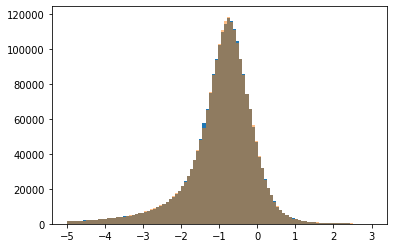

In [7]:
bins = np.linspace(-5, 3, num=100)

for counter, run in enumerate(runs.keys()):
    if counter > 0:
        alpha = 0.5
    else:
        alpha = 1
    plt.hist(np.log10(runs[run]["data"]["isrf"]), bins=bins, alpha=alpha)
    
plt.show()

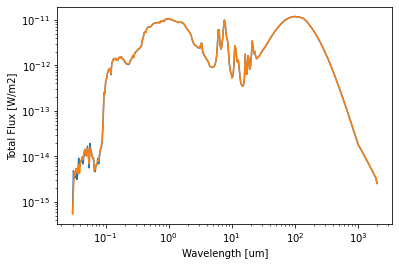

In [16]:
for counter, run in enumerate(runs.keys()):
    total_sed_i0 = runs[run]["sed"]
    plt.plot(total_sed_i0[:,0], total_sed_i0[:,0]*total_sed_i0[:,1])
    
    
plt.xlabel("Wavelength [um]")
plt.ylabel("Total Flux [W/m2]")

plt.xscale("log")
plt.yscale("log")
plt.show()